In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv('customer_behavior_train.csv')
df2=pd.read_csv('customer_behavior_test.csv')


In [2]:
#Understanding the data 
#Checking size
print(df1.shape)
print(df2.shape)


(1800, 8)
(450, 8)


In [3]:
#Taking a look at data
df1.sample(5)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
1023,2.85,9.05,1,27.45,Facebook,77.11,C,1
706,9.06,21.23,0,17.77,Facebook,157.04,C,0
1376,6.37,14.89,0,29.89,Facebook,106.76,C,0
1005,0.50,1.60,0,28.75,Instagram,56.97,A,0
980,4.32,10.44,0,26.72,Google,116.68,D,1


In [4]:
#checking the mathematical details, null data etc.
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          1800 non-null   float64
 1   Pages_viewed          1800 non-null   float64
 2   Clicked_ad            1800 non-null   int64  
 3   Cart_value            1800 non-null   float64
 4   Referral              1800 non-null   object 
 5   Browser_Refresh_Rate  1800 non-null   float64
 6   Last_Ad_Seen          1800 non-null   object 
 7   Purchase              1800 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 112.6+ KB
None
       Time_on_site  Pages_viewed   Clicked_ad   Cart_value  \
count   1800.000000   1800.000000  1800.000000  1800.000000   
mean       4.962244     12.429483     0.301111    50.352933   
std        2.336373      6.381941     0.458868    47.443390   
min        0.500000      0.760000     0.000000    10.000000   


In [5]:
sns.set_style('darkgrid')

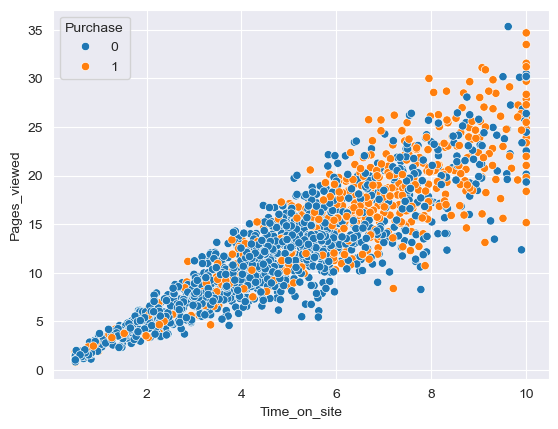

In [6]:
#To check if there is a relationship between these columns 

sns.scatterplot(x=df1['Time_on_site'],y=df1['Pages_viewed'],hue=df1['Purchase']);

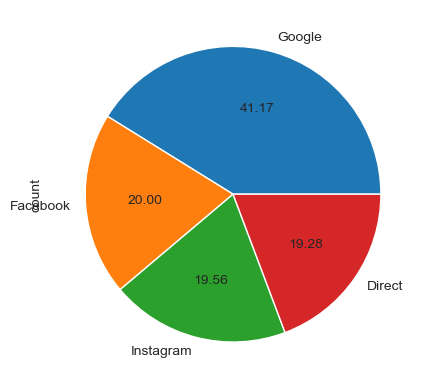

In [7]:
#To visualize percentages of each category in Referrals

df1['Referral'].value_counts().plot(kind='pie',autopct='%0.2f');


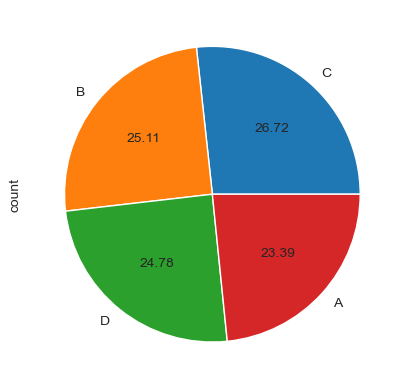

In [8]:
#To visualize percentages of each category in Last_Ad_Seen

df1['Last_Ad_Seen'].value_counts().plot(kind='pie',autopct='%0.2f');

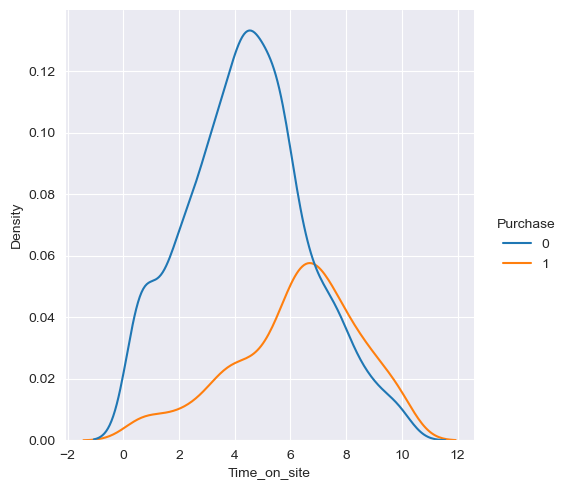

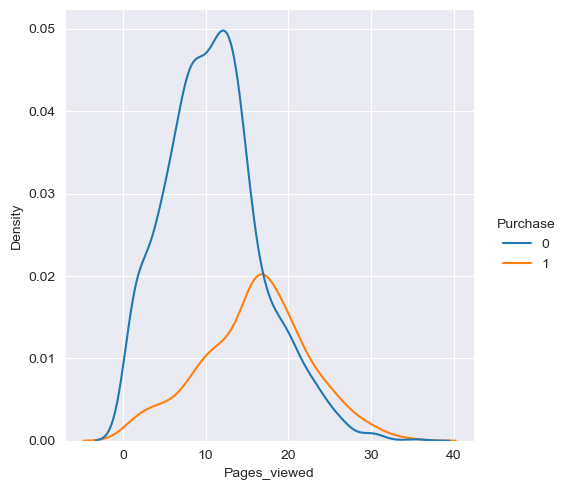

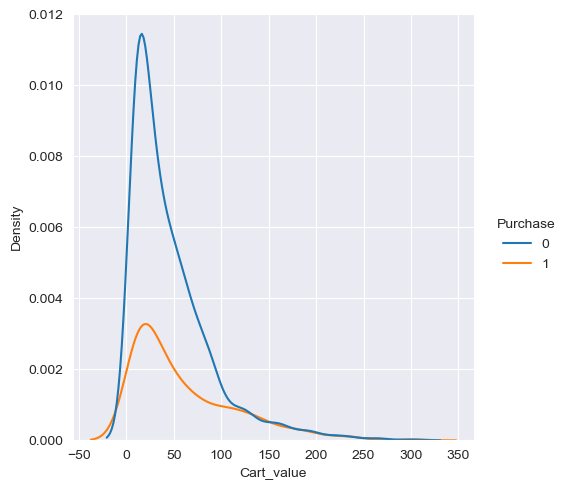

In [9]:
#Plotting the distribution plots

col=['Time_on_site','Pages_viewed','Cart_value'] 

for i in col:
    sns.displot(data=df1,x=i,hue='Purchase',kind='kde');

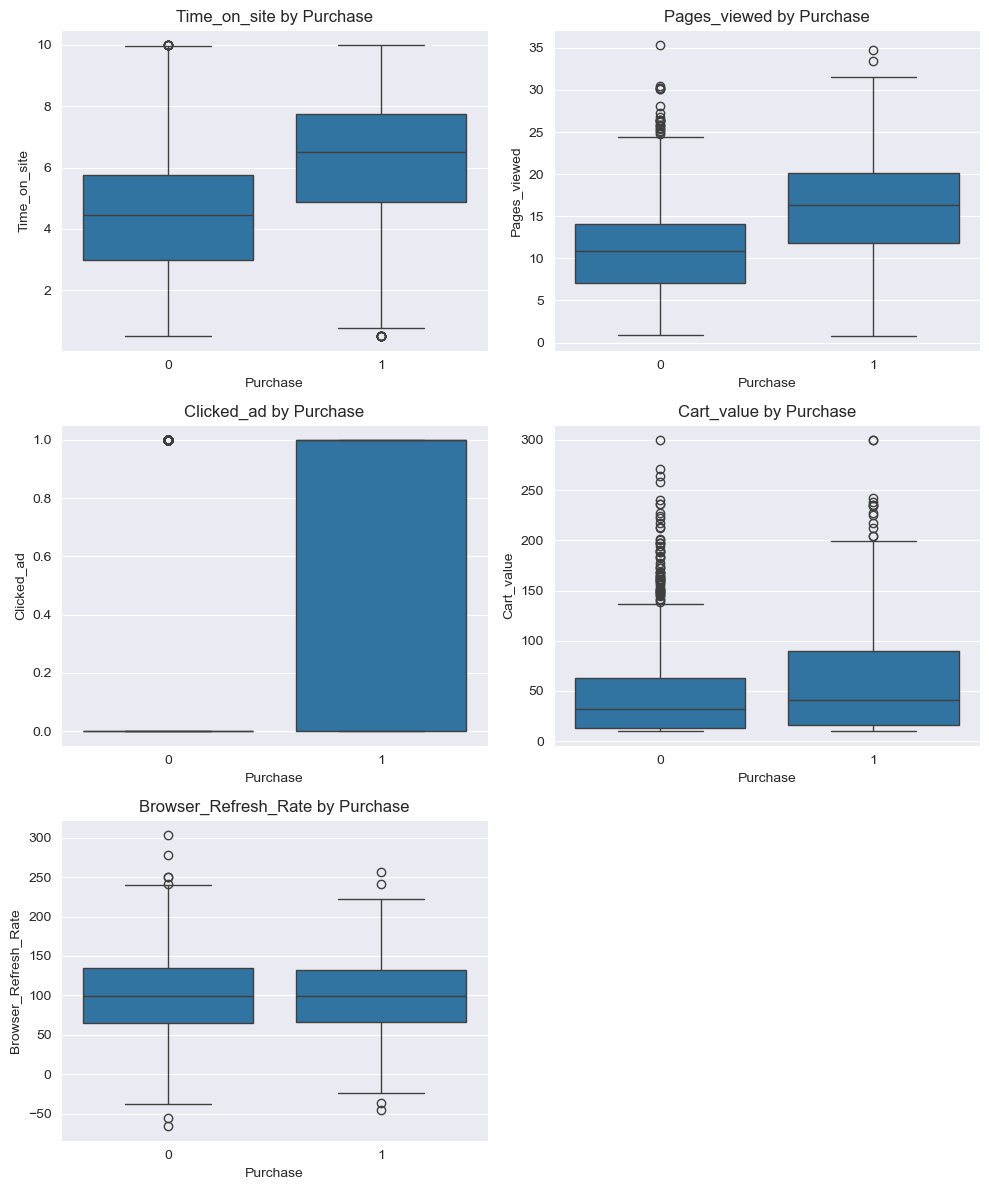

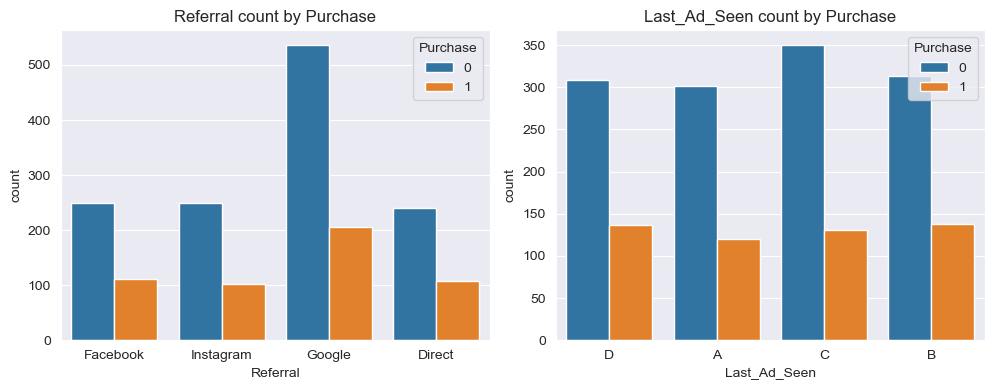

In [10]:
#Visualising relations among columns
target = 'Purchase'
#Separating columns by type
numeric_cols = df1.select_dtypes(include='number').columns.drop(target)
categorical_cols = df1.select_dtypes(include='object').columns

#Plotting numeric features with boxplots
n_num = len(numeric_cols)
n_cols = 2
n_rows = (n_num + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df1, x=target, y=col, ax=axes[i])
    axes[i].set_title(f"{col} by {target}")

#Hiding unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Plotting categorical features with countplots
if len(categorical_cols) > 0:
    n_cat = len(categorical_cols)
    n_cols = 3
    n_rows = (n_cat + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df1, x=col, hue=target, ax=axes[i])
        axes[i].set_title(f"{col} count by {target}")
        axes[i].legend(title=target)
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


Classes in training data=  Purchase
0    0.707778
1    0.292222
Name: proportion, dtype: float64
Classes in test data =  Purchase
0    0.697778
1    0.302222
Name: proportion, dtype: float64


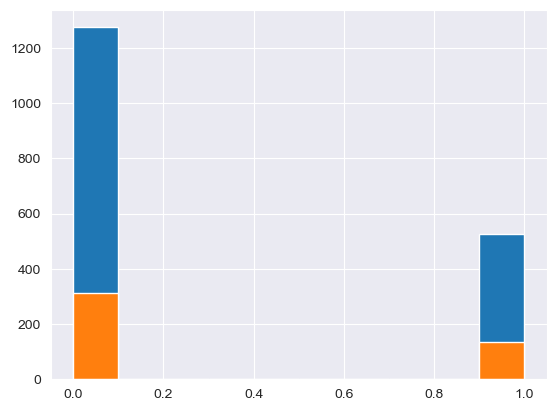

In [11]:
#Checking for class imbalance
plt.hist(df1['Purchase']);
plt.hist(df2['Purchase']);
print("Classes in training data= ",df1['Purchase'].value_counts(normalize=True))
print("Classes in test data = ",df2['Purchase'].value_counts(normalize=True))


In [12]:
#Checking correlation of Browser_Refresh_Rate wrt to out Target column

corr = df1['Browser_Refresh_Rate'].corr(df1['Purchase'])
print(f"Correlation with target: {corr}")

#Dropping the column
df1=df1.drop(columns=['Browser_Refresh_Rate'])
df2=df2.drop(columns=['Browser_Refresh_Rate'])

Correlation with target: -0.005685531276294707


In [13]:
#Checking correlation of other numerical columns

from scipy.stats import pointbiserialr

numerical_cols = ['Time_on_site', 'Clicked_ad', 'Pages_viewed', 'Cart_value']  

target = df1['Purchase']  

for col in numerical_cols:
    corr, p_value = pointbiserialr(df1[col], target)
    print(f"Correlation between {col} and target: {corr:.4f}, p-value: {p_value:.4f}")


Correlation between Time_on_site and target: 0.3441, p-value: 0.0000
Correlation between Clicked_ad and target: 0.2839, p-value: 0.0000
Correlation between Pages_viewed and target: 0.3590, p-value: 0.0000
Correlation between Cart_value and target: 0.1379, p-value: 0.0000


In [14]:
from scipy.stats import chi2_contingency

categorical_cols = ['Referral', 'Last_Ad_Seen'] 

for col in categorical_cols:
    contingency_table = pd.crosstab(df1[col], df1['Purchase'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}: p-value = {p:.4f}")


Chi-square test for Referral: p-value = 0.6243
Chi-square test for Last_Ad_Seen: p-value = 0.5977


In [15]:
#Creating the training and test set for preprocessing

x_train=df1.iloc[:,0:6]
x_test=df2.iloc[:,0:6]
y_train=df1.iloc[:,-1]
y_test=df2.iloc[:,-1]


In [16]:
#Applying Encoding for categorical columns 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['Referral']),
    ('trf2',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['Last_Ad_Seen'])
    ], remainder='passthrough'
)



x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.transform(x_test)

In [17]:
#Converting the numpy arrays to Dataframes
features=trf.get_feature_names_out()

x_train_trans=pd.DataFrame(x_train_trans,columns=features)
x_test_trans=pd.DataFrame(x_test_trans,columns=features)


In [18]:
#Applying RandomForest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# param grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'random_state': [42]
}

# Random Search for Random Forest
rf_search = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=param_dist_rf,
                               n_iter=20,
                               scoring='roc_auc',
                               cv=5,
                               random_state=42,
                               verbose=1,
                               n_jobs=-1)

rf_search.fit(x_train_trans, y_train)
best_rf = rf_search.best_estimator_

# Predict
y_pred1 = best_rf.predict(x_test_trans)
y_prob_rf = best_rf.predict_proba(x_test_trans)[:, 1]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [19]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,y_pred1)
print(accuracy1*100)


79.11111111111111


In [20]:
#Applying XGBoosting Classifier

param_dist_xgb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'use_label_encoder': [False]
}

# Random Search for XGBoost
xgb_search = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=param_dist_xgb,
                                n_iter=20,
                                scoring='accuracy',
                                cv=5,
                                random_state=42,
                                verbose=1,
                                n_jobs=-1)

xgb_search.fit(x_train_trans, y_train)
best_xgb = xgb_search.best_estimator_

# Predict
y_pred2 = best_xgb.predict(x_test_trans)
y_prob_xgb = best_xgb.predict_proba(x_test_trans)[:, 1]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


D:\Users\SOUPTIK\anaconda3\envs\ml_task\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:09] WARNING: D:\bld\xgboost-split_1748292846627\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
accuracy2=accuracy_score(y_test,y_pred2)
print(accuracy2*100)

79.11111111111111


In [22]:
#Plotting RUC curves and confusion_matrix

from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score

def plot(y_test, y_pred1, y_prob1, y_pred2, y_prob2, 
                                     model1_name='Model 1', model2_name='Model 2'):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    #ROC Curve for Model 1
    fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
    auc1 = auc(fpr1, tpr1)
    axs[0, 0].plot(fpr1, tpr1, label=f'AUC = {auc1:.3f}', color='blue')
    axs[0, 0].plot([0, 1], [0, 1], 'k--')
    axs[0, 0].set_title(f'ROC Curve - {model1_name}')
    axs[0, 0].set_xlabel('False Positive Rate')
    axs[0, 0].set_ylabel('True Positive Rate')
    axs[0, 0].legend(loc='lower right')
    axs[0, 0].text(0.6, 0.2, f"AUC = {auc1:.3f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

    # Confusion Matrix for Model 1
    cm1 = confusion_matrix(y_test, y_pred1)
    f1_1 = f1_score(y_test, y_pred1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0])
    axs[1, 0].set_title(f'Confusion Matrix - {model1_name} (F1: {f1_1:.2f})')
    axs[1, 0].set_xlabel('Predicted')
    axs[1, 0].set_ylabel('Actual')

    # ROC Curve for Model 2 
    fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
    auc2 = auc(fpr2, tpr2)
    axs[0, 1].plot(fpr2, tpr2, label=f'AUC = {auc2:.3f}', color='darkorange')
    axs[0, 1].plot([0, 1], [0, 1], 'k--')
    axs[0, 1].set_title(f'ROC Curve - {model2_name}')
    axs[0, 1].set_xlabel('False Positive Rate')
    axs[0, 1].set_ylabel('True Positive Rate')
    axs[0, 1].legend(loc='lower right')
    axs[0, 1].text(0.6, 0.2, f"AUC = {auc2:.3f}", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

    #Confusion Matrix for Model 2
    cm2 = confusion_matrix(y_test, y_pred2)
    f1_2 = f1_score(y_test, y_pred2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Oranges', ax=axs[1, 1])
    axs[1, 1].set_title(f'Confusion Matrix - {model2_name} (F1: {f1_2:.2f})')
    axs[1, 1].set_xlabel('Predicted')
    axs[1, 1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()



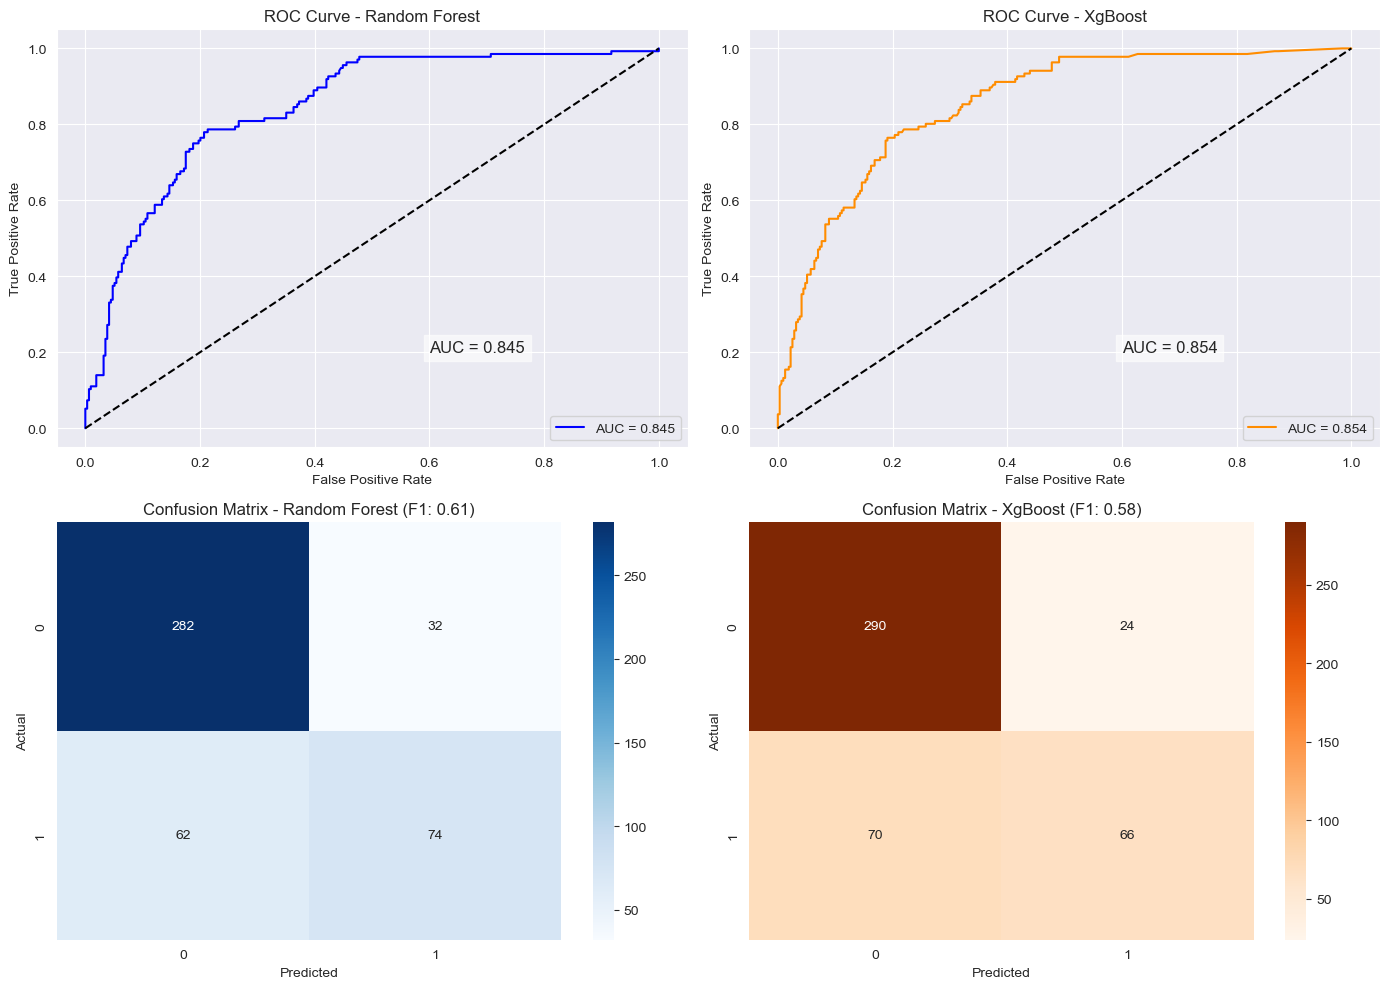

In [23]:
plot(
    y_test=y_test,
    y_pred1=y_pred1,
    y_prob1=y_prob_rf,
    y_pred2=y_pred2,
    y_prob2=y_prob_xgb,
    model1_name='Random Forest',
    model2_name='XgBoost'
)


D:\Users\SOUPTIK\anaconda3\envs\ml_task\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
D:\Users\SOUPTIK\anaconda3\envs\ml_task\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\SOUPTIK\AppData\Local\Temp\ipykernel_22196\217321535.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x', label='Test', s=30)


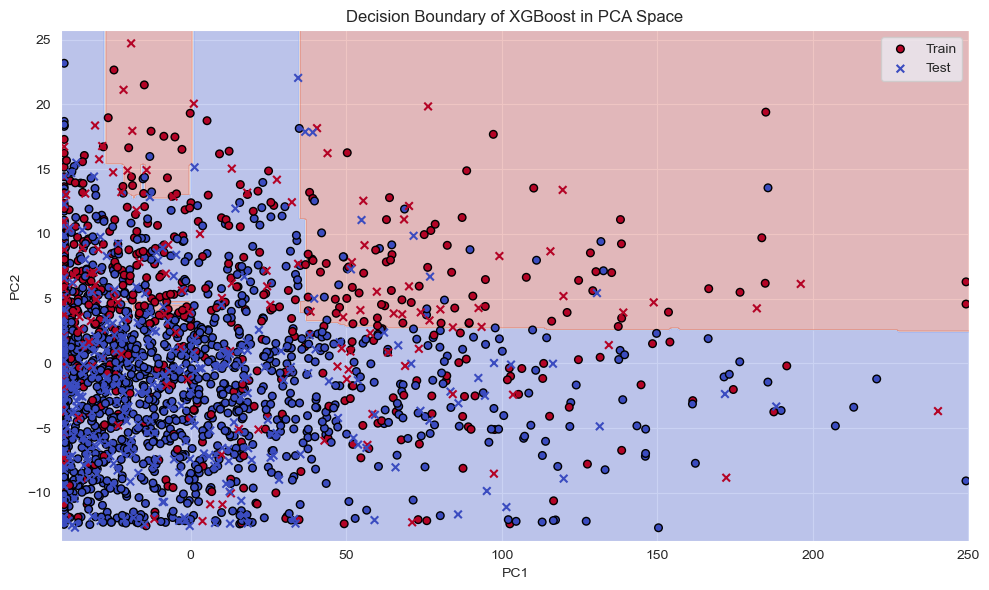

In [24]:
#Plotting the decision boundary using XGBoosting

from sklearn.decomposition import PCA


from numpy import vstack
X_combined = np.vstack((x_train_trans, x_test_trans))
pca = PCA(n_components=2)
X_combined_pca = pca.fit_transform(X_combined)

#Transforming training and test sets
X_train_pca = pca.transform(x_train_trans)
X_test_pca = pca.transform(x_test_trans)

#Definining a meshgrid over PCA components
x_min, x_max = X_combined_pca[:, 0].min() - 1, X_combined_pca[:, 0].max() + 1
y_min, y_max = X_combined_pca[:, 1].min() - 1, X_combined_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

#Projecting meshgrid back to original feature space
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_pca)

#Predicting using the original trained XGBoost model
Z = best_xgb.predict(grid_original)
Z = Z.reshape(xx.shape)

# 6. Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# 7. Plot training and test points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', marker='o', label='Train', s=30)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='x', label='Test', s=30)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary of XGBoost in PCA Space')
plt.legend()
plt.tight_layout()
plt.show()
